In [2]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt


In [3]:
ds=pd.read_csv('yoe_salary_data.csv')
ds

,YOE,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37745
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
x=ds.iloc[:,:-1].values  #select all rows except the last one
x

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2],
       [2.9],
       [3. ],
       [3.2],
       [3.2],
       [3.7],
       [3.9],
       [4. ],
       [4. ],
       [4.1],
       [4.5],
       [4.9],
       [5.1],
       [5.3],
       [5.9],
       [6. ],
       [6.8]])

In [5]:
y=ds.iloc[:,1].values  #select all rows of the last column
y

array([39343, 46205, 37745, 43525, 39891, 56642, 60150, 54445, 64445,
       57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088,
       81363, 93940, 91738], dtype=int64)

In [6]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
rr = LinearRegression()
rr.fit(x_train,y_train)


LinearRegression()

In [8]:
y_pred=rr.predict(x_test)
y_pred

array([55203.95390223, 64126.41187822, 90893.78580617, 36367.6537307 ,
       63135.02765866])

Text(0, 0.5, 'Salary')

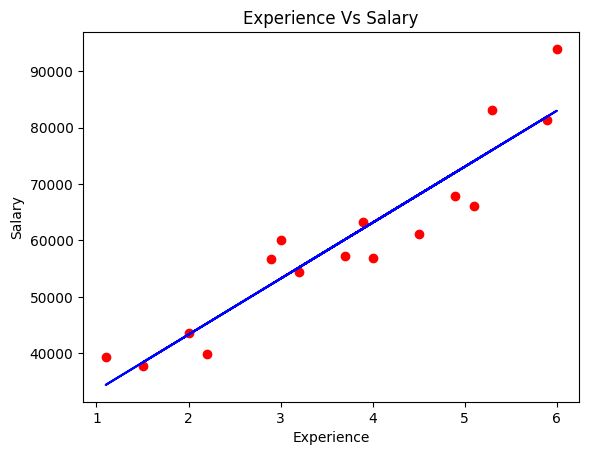

In [9]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, rr.predict(x_train), color='blue') #y_pred wont work here because it is for test data
plt.title('Experience Vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')



<Axes: >

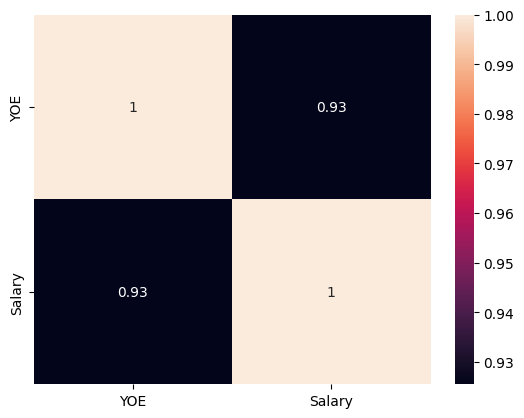

In [10]:
import seaborn as sns 
sns.heatmap(ds.corr(),annot=True)

In [16]:
from sklearn.metrics  import r2_score
r2score = r2_score(y_train,rr.predict(x_train))

In [18]:
r2score

0.8795032986406236

Outliers --> (Values which we should reject)
5,7,10,15,19,21,21,22,22,23,23,23,23,23,24,24,24,24,25
1 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

Median = 23

Quartiles
Q1 = 19
Q3 = 24

Interquartiles(IQR) --> Q3 - Q1
Q3 - Q1 --> 24 - 19 = 5

LowerOutlier --> Q1 - 1.5IQR 
Q1 - 1.5IQR --> 19 - 1.5*5 = 11.5


HigherOutlier --> Q3 + 1.5IQR
Q3 + 1.5IQR --> 24 + 1.5*5 = 31.5

In [20]:
q1 = ds['Salary'].quantile(0.25) # calculates the first quartile --> 25th percentile
q1

54445.0

In [21]:
q3 = ds['Salary'].quantile(0.75) # third quartile 75th percentile
q3

In [22]:
IQR = q3 - q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR


In [24]:
print(UL)
print(LL)

83405.0
37069.0


In [26]:
ndf = ds[(ds['Salary']<UL) & (ds['Salary']>LL)]
ndf

,YOE,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37745
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189
